## Simulating Brownian Motion 

#### Importing important libraries

In [1]:
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
import matplotlib.animation as animation


#### Defining Brownian Motion

In [2]:
def brownian_motion(N, T, h):
    """
    Simulates a Brownian motion
    :param int T: the number of continuous time steps
    :param float h: the variance of the increments
    """   
    # the normalizing constant
    dt = 1. * T/N
    # the epsilon values
    random_increments = np.random.normal(0.0, 1.0 * h, N)*np.sqrt(dt)
    # calculate the brownian motion
    brownian_motion = np.cumsum(random_increments)
    # insert the initial condition
    brownian_motion = np.insert(brownian_motion, 0, 0.0)
    
    return brownian_motion, random_increments

N = 50 # the number of discrete steps
T = 1 # the number of continuous time steps
h = 1 # the variance of the increments
dt = 1.0 * T/N  # total number of time steps

# generate a brownian motion
X, epsilon = brownian_motion(N, T ,h)
t = np.linspace(0.0, N*dt, N+1)

#### Plotting Motion

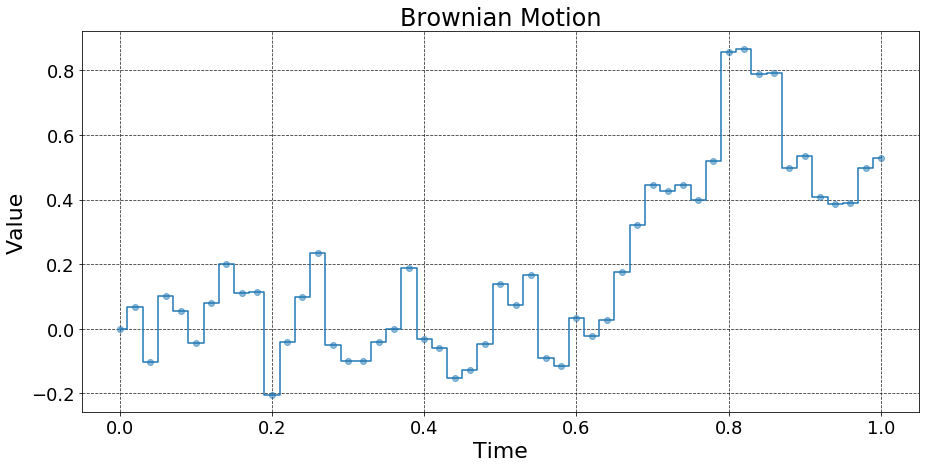

In [3]:
# plot the brownian motion
plt.figure(figsize=(15, 7))
plt.title('Brownian Motion', fontsize=24)
plt.xlabel('Time', fontsize=22)
plt.ylabel('Value', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.style.use("ggplot")

plt.grid(True, which='major', linestyle='--', color='black', alpha=0.8)
plt.step(t, X, where='mid')
plt.plot(t, X, 'C0o', alpha=0.5)
plt.show()

##### Animated Plot

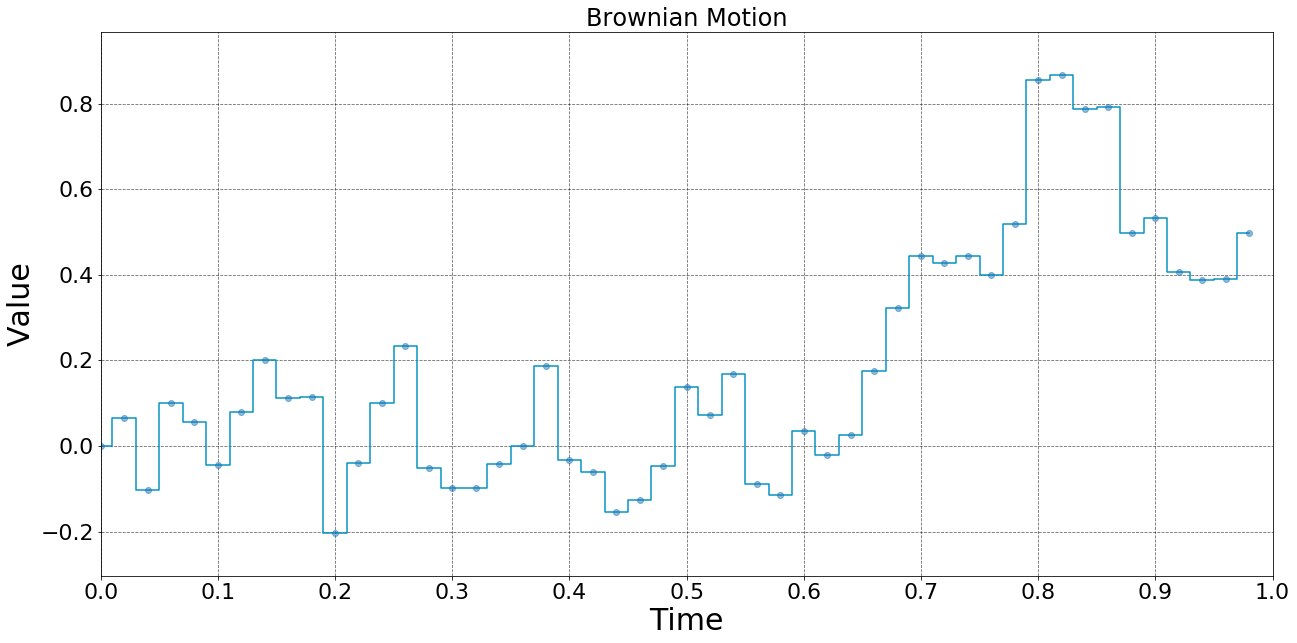

In [4]:
fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, 1)) 
line, = ax.step([], [], where='mid', color='#0492C2')
line1, = ax.plot(t, X, 'C0o', alpha=0.5)
    
# formatting options
plt.title('Brownian Motion', fontsize=24)
#plt.style.use("ggplot")
ax.set_xticks(np.linspace(0,1,11))
ax.set_xlabel('Time', fontsize=30)
ax.set_ylabel('Value', fontsize=30)
ax.set_ylim((np.min(X) - 0.1, np.max(X) + 0.1))
ax.tick_params(labelsize=22)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)

# initialization function 
def init():
    line.set_data([], [])
    return line,

xdata, ydata = [], []
x1data, y1data = [], []
# animation function 
def animate(i):
    
    # appending new points to x, y axes points list 
    xdata.append(t[i]) 
    ydata.append(X[i]) 
    line.set_data(xdata, ydata)
    x1data.append(t[i]) 
    y1data.append(X[i]) 
    line1.set_data(x1data, y1data) 
    return line, line1,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=50, blit=True)
f = r"./brownian.gif" 
writergif = animation.PillowWriter(fps=15) 
anim.save(f, writer=writergif)